## Urdu NLP using different classifiers and vectorizers

In [1]:
import pandas as pd
import numpy as np
import gensim
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_score, recall_score

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import keras.backend as K
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential

### Getting data ready

In [2]:
df=pd.read_csv("army_v2.csv",usecols=[1,2])

In [116]:
df.head(10)

,Sentiment,tokenized
0,1,"['یہ', 'تو', 'ہونا', 'ہی', 'تھا', 'اور', 'مانگ..."
1,1,"['فوج', 'اور', 'کمانڈرز', 'کا', 'کام', 'ہیں', ..."
2,0,"['کچھ', 'مثبت', 'باتیں', 'کریں', 'پاکستان', 'ک..."
3,1,"['فوج', 'بھی', 'اور', 'کیا', 'کر', 'سکتی', 'ہے..."
4,1,"['اور', 'مانگو', 'فوج', 'سے', 'رسیدیں']"
5,0,"['جب', 'تک', 'فوج', 'ہے', 'ان', 'کا', 'باپ', '..."
6,1,"['پہلے', 'دہشت', 'گردوں', 'کو', 'پالنے', 'اور'..."
7,1,"['یہ', 'حملے', 'ہمیشہ', 'سے', 'فوج', 'کرتی', '..."
8,0,"['یا', 'اللہ', 'پاکستان', 'کی', 'حفاظت', 'فرما..."
9,1,"['اتی', 'کمزور', 'فوج', 'ہے', 'کہ', 'اپوزیشن',..."


In [53]:
np.random.seed(24)
X_train, X_test, y_train, y_test=train_test_split(df.tokenized,df.Sentiment,test_size=0.2)

In [54]:
X_train.head()

467    ['ہم', 'عمران', 'اور', 'پاک', 'فوج', 'سے', 'اخ...
296    ['جس', 'سے', 'اسلامی', 'ملک', 'نے', 'ترقی', 'ک...
459    ['آپ', 'لوگوں', 'کے', 'انڈین', 'بیانیے', 'کو',...
438    ['حکومت', 'تو', 'تھی', 'لیکن', 'آپ', 'اس', 'بی...
411    ['نواز', 'نہ', 'خلاف', 'ناکام', 'تھا', 'اور', ...
Name: tokenized, dtype: object

### Using TF-IDF Vectorizer

In [104]:
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train)
X_train_vect = tfidf_vect.transform(X_train)
X_test_vect = tfidf_vect.transform(X_test)

In [106]:
X_test_vect.shape

(131, 2237)

In [57]:
tfidf_vect.vocabulary_

{'ہم': 2139,
 'عمران': 1138,
 'اور': 184,
 'پاک': 1645,
 'فوج': 1193,
 'سے': 1029,
 'اخری': 82,
 'حد': 643,
 'تک': 505,
 'محبت': 1352,
 'کرتے': 1889,
 'ہےتم': 2202,
 'جسے': 589,
 'بمبو': 327,
 'بونکھتے': 354,
 'رہو': 883,
 'جس': 583,
 'اسلامی': 98,
 'ملک': 1426,
 'نے': 1559,
 'ترقی': 465,
 'کی': 2010,
 'ہے': 2198,
 'اس': 92,
 'کو': 1948,
 'بیرکوں': 432,
 'محدود': 1355,
 'کر': 1882,
 'رکھا': 859,
 'آپ': 47,
 'لوگوں': 1268,
 'کے': 2030,
 'انڈین': 173,
 'بیانیے': 428,
 'خدا': 690,
 'غارت': 1148,
 'کرےاور': 1927,
 'میرے': 1473,
 'پاکستان': 1646,
 'جیسے': 631,
 'محفوظ': 1358,
 'رکھے': 869,
 'آمین': 41,
 'ثم': 535,
 'زندہ': 917,
 'پائندہ': 1632,
 'باد': 256,
 'حکومت': 673,
 'تو': 494,
 'تھی': 518,
 'لیکن': 1306,
 'بیشرم': 433,
 'ظالم': 1109,
 'نہیں': 1542,
 'جانتے': 552,
 'نواز': 1514,
 'نہ': 1536,
 'خلاف': 701,
 'ناکام': 1495,
 'تھا': 509,
 'آج': 17,
 'ہےیہ': 2218,
 'یاد': 2220,
 'رکھیں': 868,
 'میں': 1480,
 'کل': 1932,
 'بھی': 410,
 'جمہوریت': 602,
 'چاہنے': 1756,
 'والے': 1576,
 'تھے': 52

In [58]:
# How are these vectors stored?
X_test_vect[0]

<1x2237 sparse matrix of type '<class 'numpy.float64'>'
	with 17 stored elements in Compressed Sparse Row format>

In [59]:
# Can we convert the vectors to arrays?
X_test_vect[0].toarray()[:,:20]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

In [107]:

#Ensemble Method
RFC = RandomForestClassifier().fit(X_train_vect, y_train.values.ravel())

#Linear Model
LR=LogisticRegression().fit(X_train_vect, y_train.values.ravel())

#SVM Classifier
SV=SVC().fit(X_train_vect, y_train.values.ravel())

#Naive Bayes
NV=MultinomialNB().fit(X_train_vect, y_train.values.ravel())

#SGD Classifier

SGC=SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3).fit(X_train_vect, y_train.values.ravel())

In [61]:
# Evaluate the predictions of the model on the holdout test set
def score_model(model,X_test,y_test):
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred,zero_division=1)
    recall = recall_score(y_test, y_pred)
    print('Model : {}\n \nPrecision: {}  \nRecall: {}  \nAccuracy: {}\n'.format(model,
        round(precision*100, 2), round(recall*100, 2), round((y_pred==y_test).sum()/len(y_pred)*100, 2)))

In [62]:
classifiers=pd.Series([RFC,LR,SV,NV,SGC])

In [63]:
classifiers.apply(lambda x: score_model(x,X_test_vect,y_test))

Model : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
 
Precision: 60.94  
Recall: 60.94  
Accuracy: 61.83

Model : LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
 
Precision: 64.29  
Recall: 56.25  
Accuracy: 63.36

Mod

0    None
1    None
2    None
3    None
4    None
dtype: object

### Using Word2Vec:

In [135]:
# Train a basic word2vec model
w2v_model = gensim.models.Word2Vec(X_train,
                                   size=100,
                                   window=3,
                                   min_count=2)

In [136]:
# Replace the words in each text message with the learned word vector
words = set(w2v_model.wv.index2word)
X_train_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])
                         for ls in X_train])
X_test_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])
                         for ls in X_test])

In [137]:
# Average the word vectors for each sentence (and assign a vector of zeros if the model
# did not learn any of the words in the text message during training
X_train_vect_avg = []
for v in X_train_vect:
    if v.size:
        X_train_vect_avg.append(v.mean(axis=0))
    else:
        X_train_vect_avg.append(np.zeros(100, dtype=float))
        
X_test_vect_avg = []
for v in X_test_vect:
    if v.size:
        X_test_vect_avg.append(v.mean(axis=0))
    else:
        X_test_vect_avg.append(np.zeros(100, dtype=float))

In [138]:
# What does the unaveraged version look like?
X_train_vect[0]

array([[-0.12654778, -0.11296749,  0.18517725, ...,  0.06914411,
         0.0479546 ,  0.11621889],
       [-0.14581652, -0.08997624,  0.18536668, ...,  0.04528995,
         0.0486755 ,  0.03292599],
       [-0.10708011, -0.09568459,  0.1479354 , ...,  0.03554029,
         0.03099994,  0.107517  ],
       ...,
       [-0.1115747 , -0.10220882,  0.17233565, ...,  0.07046615,
         0.03435243,  0.09533497],
       [-0.14581652, -0.08997624,  0.18536668, ...,  0.04528995,
         0.0486755 ,  0.03292599],
       [-0.12140755, -0.10565443,  0.17114109, ...,  0.04785639,
         0.03307514,  0.12867014]], dtype=float32)

In [139]:
# What does the averaged version look like?
X_train_vect_avg[0]

array([-0.12039705, -0.10330636,  0.17110604,  0.13034058, -0.047478  ,
       -0.0007347 , -0.14006811, -0.0914324 , -0.09720456,  0.14930548,
        0.10571707, -0.14546143,  0.01420777, -0.21917637, -0.10353499,
        0.00883764, -0.2604742 , -0.18281567, -0.09634913, -0.17424968,
        0.04406248, -0.04154793,  0.00152336,  0.14342928,  0.15694079,
        0.24259889, -0.06930038,  0.08225114,  0.01531409, -0.10653918,
       -0.05281342, -0.00313924,  0.09728685,  0.00556863,  0.03006597,
       -0.00756577,  0.03815665,  0.2450514 , -0.18102938,  0.05627673,
        0.2596224 , -0.05930251,  0.01090463, -0.01856641,  0.10712709,
        0.02695554,  0.02526928,  0.04621621,  0.03715387,  0.07142179,
       -0.10083733, -0.16816893, -0.01888485,  0.05900994, -0.14658445,
        0.02030676,  0.01569707,  0.07068527, -0.03007699, -0.01615311,
        0.09804037, -0.09372903,  0.11264062, -0.12348262, -0.06625409,
        0.16165368,  0.02764407, -0.22570838,  0.11309785,  0.18

In [140]:
np.random.seed(42)
# train model

#Ensemble Method
RFC = RandomForestClassifier().fit(X_train_vect_avg, y_train.values.ravel())

#Linear Model
LR=LogisticRegression().fit(X_train_vect_avg, y_train.values.ravel())

#SVM Classifier
SV=SVC().fit(X_train_vect_avg, y_train.values.ravel())


#SGD Classifier

SGC=SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3).fit(X_train_vect_avg, y_train.values.ravel())

In [141]:
classifiers_w2v=pd.Series([RFC,LR,SV,SGC])

In [142]:
classifiers_w2v.apply(lambda x: score_model(x,X_test_vect_avg,y_test))

Model : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
 
Precision: 58.0  
Recall: 45.31  
Accuracy: 57.25

Model : LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
 
Precision: 100.0  
Recall: 0.0  
Accuracy: 51.15

Model 

0    None
1    None
2    None
3    None
dtype: object

### Usind doc2vec: 

In [143]:
# Created TaggedDocument vectors for each text message in the training and test sets
tagged_docs_train = [gensim.models.doc2vec.TaggedDocument(v, [i])
                     for i, v in enumerate(X_train)]
tagged_docs_test = [gensim.models.doc2vec.TaggedDocument(v, [i])
                    for i, v in enumerate(X_test)]

In [144]:
# What do these TaggedDocument objects look like?
tagged_docs_train[:10]

[TaggedDocument(words="['ہم', 'عمران', 'اور', 'پاک', 'فوج', 'سے', 'اخری', 'حد', 'تک', 'محبت', 'کرتے', 'ہےتم', 'جسے', 'بمبو', 'بونکھتے', 'رہو']", tags=[0]),
 TaggedDocument(words="['جس', 'سے', 'اسلامی', 'ملک', 'نے', 'ترقی', 'کی', 'ہے', 'اس', 'نے', 'فوج', 'کو', 'بیرکوں', 'تک', 'محدود', 'کر', 'رکھا', 'ہے']", tags=[1]),
 TaggedDocument(words="['آپ', 'لوگوں', 'کے', 'انڈین', 'بیانیے', 'کو', 'خدا', 'غارت', 'کرےاور', 'میرے', 'ملک', 'پاکستان', 'کو', 'آپ', 'جیسے', 'لوگوں', 'سے', 'محفوظ', 'رکھے', 'آمین', 'ثم', 'آمین', 'پاک', 'فوج', 'زندہ', 'پاکستان', 'پائندہ', 'باد']", tags=[2]),
 TaggedDocument(words="['حکومت', 'تو', 'تھی', 'لیکن', 'آپ', 'اس', 'بیشرم', 'اور', 'ظالم', 'فوج', 'کو', 'نہیں', 'جانتے']", tags=[3]),
 TaggedDocument(words="['نواز', 'نہ', 'خلاف', 'ناکام', 'تھا', 'اور', 'نہ', 'آج', 'ناکام', 'ہےیہ', 'یاد', 'رکھیں', 'فوج', 'میں', 'کل', 'بھی', 'جمہوریت', 'کے', 'چاہنے', 'والے', 'تھے', 'اور', 'فوج', 'میں', 'آج', 'بھی', 'جمہوریت', 'کو', 'چاہنے', 'والے', 'ہیں']", tags=[4]),
 TaggedDocument(words

In [145]:
# Train a basic doc2vec model
d2v_model = gensim.models.Doc2Vec(tagged_docs_train,
                                  vector_size=100,
                                  window=5,
                                  min_count=2)

In [146]:
# Infer the vectors to be used in training and testing
train_vectors = [d2v_model.infer_vector(eval(v.words)) for v in tagged_docs_train]
test_vectors = [d2v_model.infer_vector(eval(v.words)) for v in tagged_docs_test]   

In [147]:
np.random.seed(42)
# train model

#Ensemble Method
RFC = RandomForestClassifier().fit(train_vectors, y_train.values.ravel())

#Linear Model
LR=LogisticRegression().fit(train_vectors, y_train.values.ravel())

#SVM Classifier
SV=SVC().fit(train_vectors, y_train.values.ravel())


#SGD Classifier

SGC=SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3).fit(train_vectors, y_train.values.ravel())

In [148]:
classifiers_w2d=pd.Series([RFC,LR,SV,SGC])


In [149]:
classifiers_w2d.apply(lambda x: score_model(x,test_vectors,y_test))

Model : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
 
Precision: 41.94  
Recall: 20.31  
Accuracy: 47.33

Model : LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
 
Precision: 100.0  
Recall: 0.0  
Accuracy: 51.15

Model

0    None
1    None
2    None
3    None
dtype: object

### Using RNN 

In [150]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [151]:
# Pad the sequences so each sequence is the same length
X_train_seq_padded = pad_sequences(X_train_seq, 60)
X_test_seq_padded = pad_sequences(X_test_seq, 60)

In [152]:
def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

In [153]:
# Construct our basic RNN model framework
model = Sequential()
model.add(Embedding(len(tokenizer.index_word)+1, 64))
model.add(LSTM(64, dropout=0, recurrent_dropout=0))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 64)          143872    
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 179,009
Trainable params: 179,009
Non-trainable params: 0
_________________________________________________________________


In [154]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', precision_m, recall_m])

In [155]:
# Fit the RNN
history = model.fit(X_train_seq_padded, y_train, 
                    batch_size=32, epochs=12,
                    validation_data=(X_test_seq_padded, y_test))

Epoch 1/12
17/17 [==============================] - 3s 149ms/step - loss: 0.6877 - accuracy: 0.5477 - precision_m: 0.2172 - recall_m: 0.1587 - val_loss: 0.6882 - val_accuracy: 0.5115 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/12
17/17 [==============================] - 1s 69ms/step - loss: 0.6595 - accuracy: 0.5553 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 0.6634 - val_accuracy: 0.5344 - val_precision_m: 0.4643 - val_recall_m: 0.1316
Epoch 3/12
17/17 [==============================] - 1s 56ms/step - loss: 0.5243 - accuracy: 0.7958 - precision_m: 0.8957 - recall_m: 0.5846 - val_loss: 0.6292 - val_accuracy: 0.6641 - val_precision_m: 0.6593 - val_recall_m: 0.7170
Epoch 4/12
17/17 [==============================] - 1s 51ms/step - loss: 0.3167 - accuracy: 0.9447 - precision_m: 0.9413 - recall_m: 0.9392 - val_loss: 0.6833 - val_accuracy: 0.6641 - val_precision_m: 0.6389 - val_recall_m: 0.8130
Epoch 5/12
17/17 [==============================] - 1s 47ms

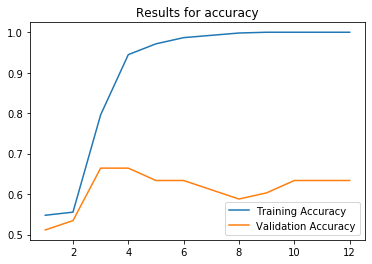

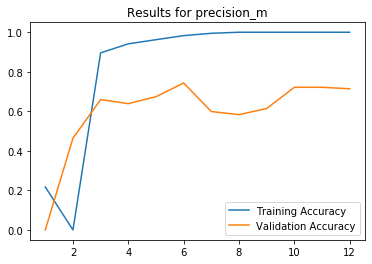

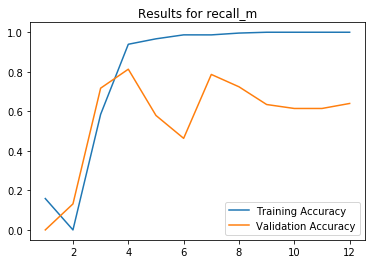

In [156]:
# Plot basic evaluation metrics across epochs
import matplotlib.pyplot as plt
%matplotlib inline

for i in ['accuracy', 'precision_m', 'recall_m']:
    acc = history.history[i]
    val_acc = history.history['val_{}'.format(i)]
    epochs = range(1, len(acc) + 1)

    plt.figure()
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Results for {}'.format(i))
    plt.legend()
    plt.show()